In [1]:
import glob

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [58]:
import numpy as np
import time
import visa
from scipy.optimize import curve_fit

In [9]:
cd /Users/cosmology/Google Drive/Projects/radiometer

/Users/cosmology/Google Drive/Projects/radiometer


In [119]:
date = "2016-11-18"
t = ""
files = glob.glob("Data/"+date+"_"+t+"*.txt")
print(files)

['Data/2016-11-18_14:39:10_Readout.txt', 'Data/2016-11-18_14:41:54_Readout.txt', 'Data/2016-11-18_14:43:40_Readout.txt', 'Data/2016-11-18_14:45:45_Readout.txt', 'Data/2016-11-18_14:47:29_Readout.txt', 'Data/2016-11-18_14:48:48_Readout.txt', 'Data/2016-11-18_14:51:28_Readout.txt', 'Data/2016-11-18_14:53:24_Readout.txt', 'Data/2016-11-18_14:56:37_Readout.txt', 'Data/2016-11-18_14:59:01_Readout.txt', 'Data/2016-11-18_15:01:03_Readout.txt', 'Data/2016-11-18_15:02:32_Readout.txt', 'Data/2016-11-18_15:04:02_Readout.txt', 'Data/2016-11-18_15:05:25_Readout.txt', 'Data/2016-11-18_15:06:46_Readout.txt', 'Data/2016-11-18_15:08:22_Readout.txt', 'Data/2016-11-18_15:10:12_Readout.txt', 'Data/2016-11-18_15:11:39_Readout.txt', 'Data/2016-11-18_15:13:36_Readout.txt', 'Data/2016-11-18_15:16:00_Readout.txt', 'Data/2016-11-18_15:17:31_Readout.txt', 'Data/2016-11-18_15:19:16_Readout.txt', 'Data/2016-11-18_15:20:39_Readout.txt', 'Data/2016-11-18_15:23:25_Readout.txt', 'Data/2016-11-18_15:25:09_Readout.txt',

In [118]:
fl = open(f)
fl.close()

-0.840382552301


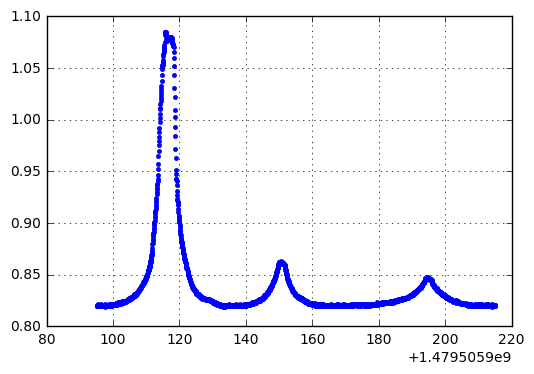

In [117]:
for f in files[-1:]:
    data=np.loadtxt(f)
    plot(data[:,0],-data[:,1], '.')
    grid()
    print(np.mean(data[:,1]))
#savefig("Data/2016-11-11_Interval-1m_90-20.png")

In [33]:
angles = np.linspace(20,90,(90-20)/5+1)
print((90-20)/5+1)
print(angles)

15
[ 20.  25.  30.  35.  40.  45.  50.  55.  60.  65.  70.  75.  80.  85.  90.]


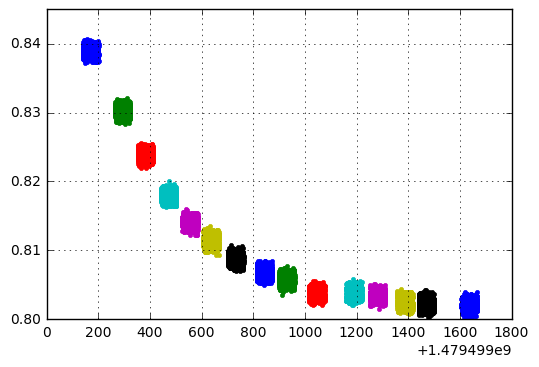

In [44]:
angles = np.linspace(20,90,(90-20)/5+1)
idx = 0
medians = np.zeros(15)
stds = np.zeros(15)
for f in files[9:9+15]:
    data=np.loadtxt(f)
    plot(data[:,0],-data[:,1], '.')
    grid()
    medians[idx] = np.median(data[:,1])
    stds[idx] = np.std(data[:,1])
    idx += 1

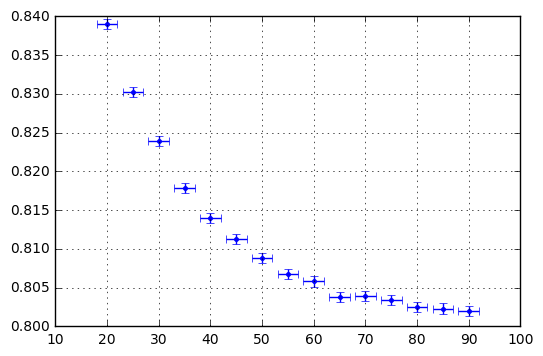

In [101]:
errorbar(angles,-medians,yerr=stds,xerr=2,fmt='.')
#plot(angles, (-medians[-1])*1/cos(radians(90-angles)))
grid()

In [59]:
def cosFit(x,a,x_0):
    return x_0*1/cos(a*radians(90-x))


In [77]:
x,z = curve_fit(cosFit,angles,medians)
print(x)

[ 0.23384393 -0.80018644]


In [76]:
plot(angles,medians,cosFit(angles,x(1),x(2)))

TypeError: 'numpy.ndarray' object is not callable